## PlotI-2theta.ipynb

Written by Adam Creuziger (adam.creuziger@nist.gov)

Oct 2017

This data was developed by employees of the National Institute of Standards and Technology (NIST), an agency of the Federal Government. Pursuant to title 17 United States Code Section 105, works of NIST employees are not subject to copyright protection in the United States and are considered to be in the public domain.

The data is provided by NIST as a public service and is expressly provided "AS IS." NIST MAKES NO WARRANTY OF ANY KIND, EXPRESS, IMPLIED OR STATUTORY, INCLUDING, WITHOUT LIMITATION, THE IMPLIED WARRANTY OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, NON-INFRINGEMENT AND DATA ACCURACY. NIST does not warrant or make any representations regarding the use of the data or the results thereof, including but not limited to the correctness, accuracy, reliability or usefulness of the data. NIST SHALL NOT BE LIABLE AND YOU HEREBY RELEASE NIST FROM LIABILITY FOR ANY INDIRECT, CONSEQUENTIAL, SPECIAL, OR INCIDENTAL DAMAGES (INCLUDING DAMAGES FOR LOSS OF BUSINESS PROFITS, BUSINESS INTERRUPTION, LOSS OF BUSINESS INFORMATION, AND THE LIKE), WHETHER ARISING IN TORT, CONTRACT, OR OTHERWISE, ARISING FROM OR RELATING TO THE DATA (OR THE USE OF OR INABILITY TO USE THIS DATA), EVEN IF NIST HAS BEEN ADVISED OF THE POSSIBILITY OF SUCH DAMAGES.

To the extent that NIST may hold copyright in countries other than the United States, you are hereby granted the non-exclusive irrevocable and unconditional right to print, publish, prepare derivative works and distribute the NIST data, in any medium, or authorize others to do so on your behalf, on a royalty-free basis throughout the world.

You may improve, modify, and create derivative works of the data or any portion of the data, and you may copy and distribute such modifications or works. Modified works should carry a notice stating that you changed the data and should note the date and nature of any such change. Please explicitly acknowledge the National Institute of Standards and Technology as the source of the data: Data citation recommendations are provided below.

Permission to use this data is contingent upon your acceptance of the terms of this agreement and upon your providing appropriate acknowledgments of NIST's creation of the data.

See: https://www.nist.gov/director/licensing


## Packages used in this Jupyter Notebook

In [1]:
import numpy as np #check
import matplotlib.pyplot as plt  #check

### Import datafiles exported from MAUD

In [3]:
TRIP700Data = np.loadtxt(fname='TRIP700-NDSingle/Tilt0Rot0.txt', skiprows=0)
print (TRIP700Data[:][1000])
TRIP780Data = np.loadtxt(fname='TRIP780-NDSingle/Tilt0Rot0.txt', skiprows=0)
print (TRIP780Data[:][1000])
UniformData = np.loadtxt(fname='Uniform-NDSingle/Tilt0Rot0.txt', skiprows=0)
print (UniformData[:][1000])

[50.         23.35191173]
[50.       16.805761]
[50.        38.2818225]


In [4]:
#From MAUD settings:
XrayLambda= 1.540538 #wavelength of a Single Cu peak, units of angstroms

## Add Tick Labels for full and reduced range plots 

In [5]:
#Ferrite dspacing

FPeakLabels=['\nF110','F200','F211','F220','\nF310','F222']
FPeakDspace=np.array([2.0269215882712386,1.4332500000000001,1.1702437246146635,1.0134607941356193,
            0.906466891287266,0.8274872733160311])


FPeakLabels2=['F200','F211']
FPeakDspace2=np.array([1.4332500000000001,1.1702437246146635])


FPeak2theta=2.0*(np.degrees(np.arcsin((XrayLambda/2.0)*(1.0/FPeakDspace))))
FPeak2theta2=2.0*(np.degrees(np.arcsin((XrayLambda/2.0)*(1.0/FPeakDspace2))))



In [6]:
#Austenite dspacing
APeakLabels=['A111\n','A200','A220','A311','A222','A400\n','A331','A420']
APeakDspace=np.array([2.105423226653808,1.82335,1.2893031494764915,1.0995214202717305,
            1.052711613326904,0.911675,0.8366103567057775,0.8154269093548484])

APeakLabels2=['A200','A220']
APeakDspace2=np.array([1.82335,1.2893031494764915])

APeak2theta=2.0*(np.degrees(np.arcsin((XrayLambda/2.0)*(1.0/APeakDspace))))
APeak2theta2=2.0*(np.degrees(np.arcsin((XrayLambda/2.0)*(1.0/APeakDspace2))))


## Plot Uniform Texture (Fig 1)

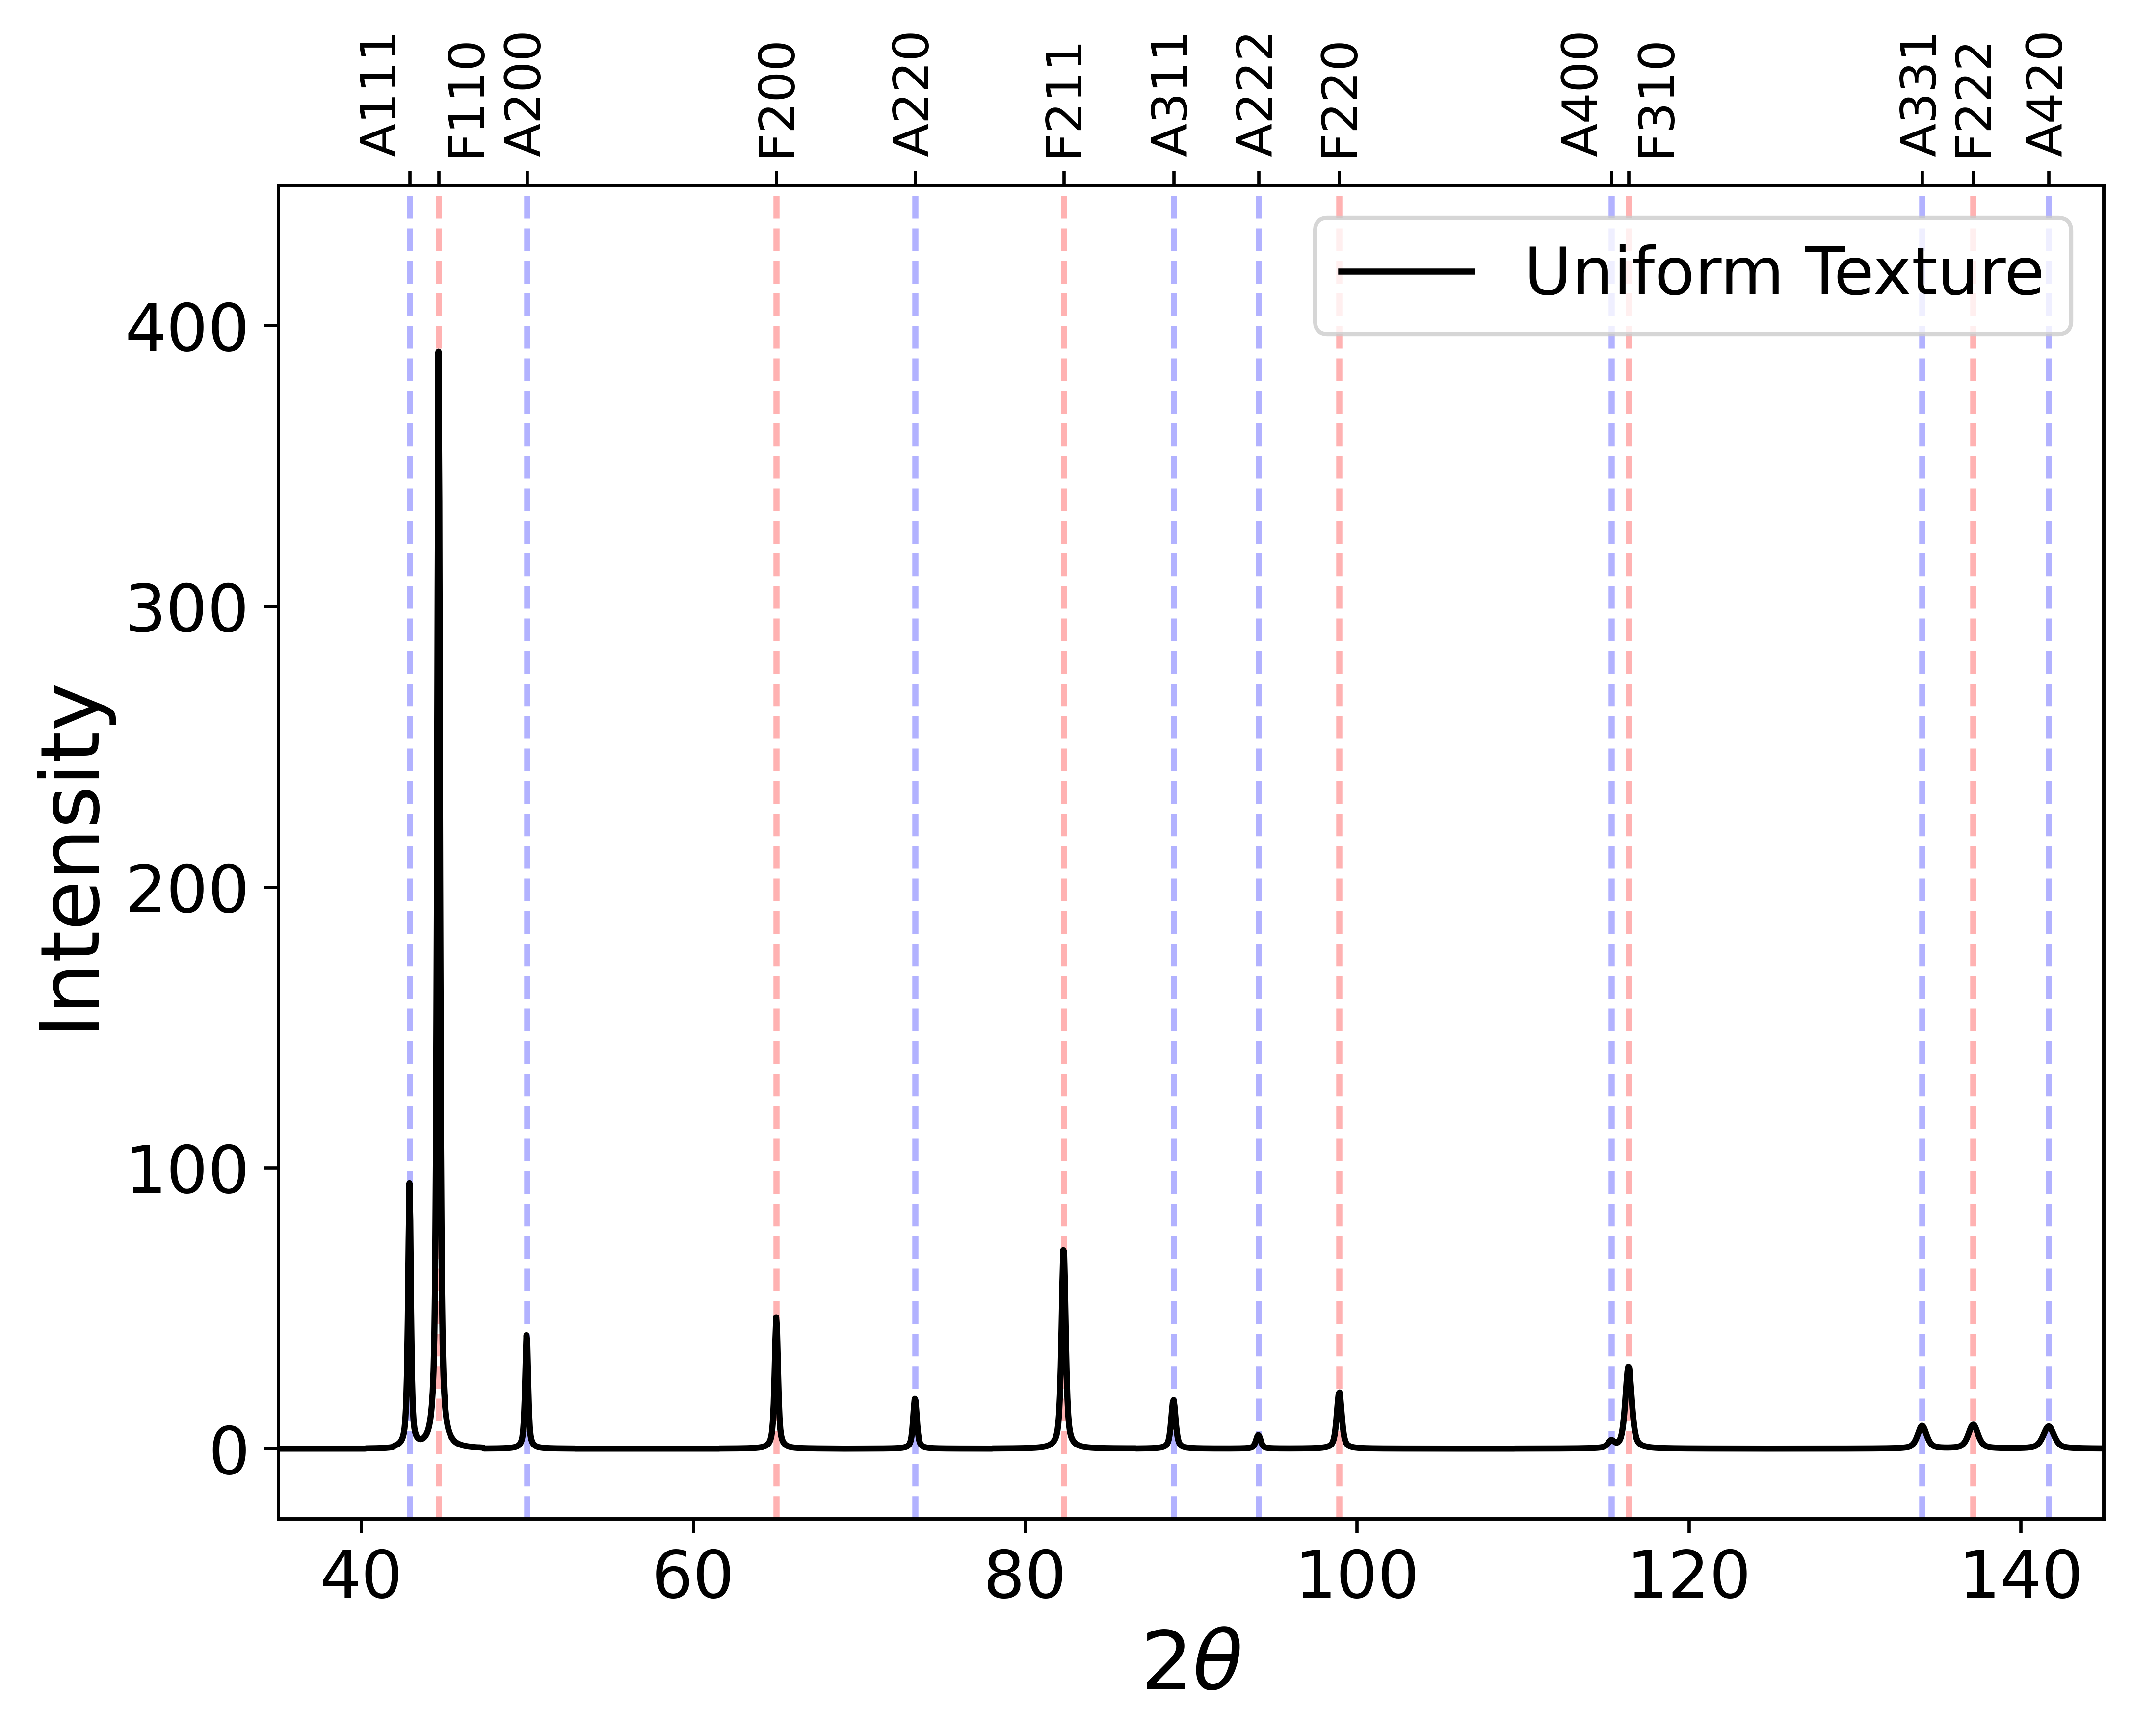

In [7]:
fig=plt.figure(figsize=(8,6), dpi=600)
ax1 = fig.add_subplot(111)

ax1.set_xlim(35,145)
ax1.set_xlabel(r'2$\theta$', fontsize=20)

ax1.set_ylim(-25,450)
ax1.set_ylabel('Intensity', fontsize=20)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)


ax2 = ax1.twiny() # to show tick labels
ax2.set_xlim(ax1.get_xlim())



ManyLabels=np.append(APeakLabels,FPeakLabels)
ManyTics=np.append(APeak2theta,FPeak2theta)

#print ManyTics

ax2.set_xticks(ManyTics)
ax2.set_xticklabels(ManyLabels, color='k', rotation=90)
ax2.xaxis.set_tick_params(labelsize=12)

for pos in APeak2theta:
    ax1.axvline(pos,color='b',linestyle='dashed',alpha=.3,zorder=1)

for pos in FPeak2theta:
    ax1.axvline(pos,color='r',linestyle='dashed',alpha=.3,zorder=1)
    


#legend=ax1.legend(loc='upper right',fontsize=20)
ax1.plot(UniformData[:,0],UniformData[:,1], label='Uniform Texture',color='k')
#ax1.plot(TRIP700Data[:,0],TRIP700Data[:,1], label='',color='m')


#ax1.set_xlim([40, 145])



ax1.legend(loc='upper right',fontsize=16)
# Remove comment character to save to file
#plt.savefig("I-2theta-Draft.pdf", dpi=600,format="pdf")
#plt.savefig("I-2theta-Draft.eps", dpi=600,format="eps")
plt.savefig("I-2theta-Draft.png", dpi=600,format="png")


plt.show()

## Plot zoomed in region next to each other (Fig 6)

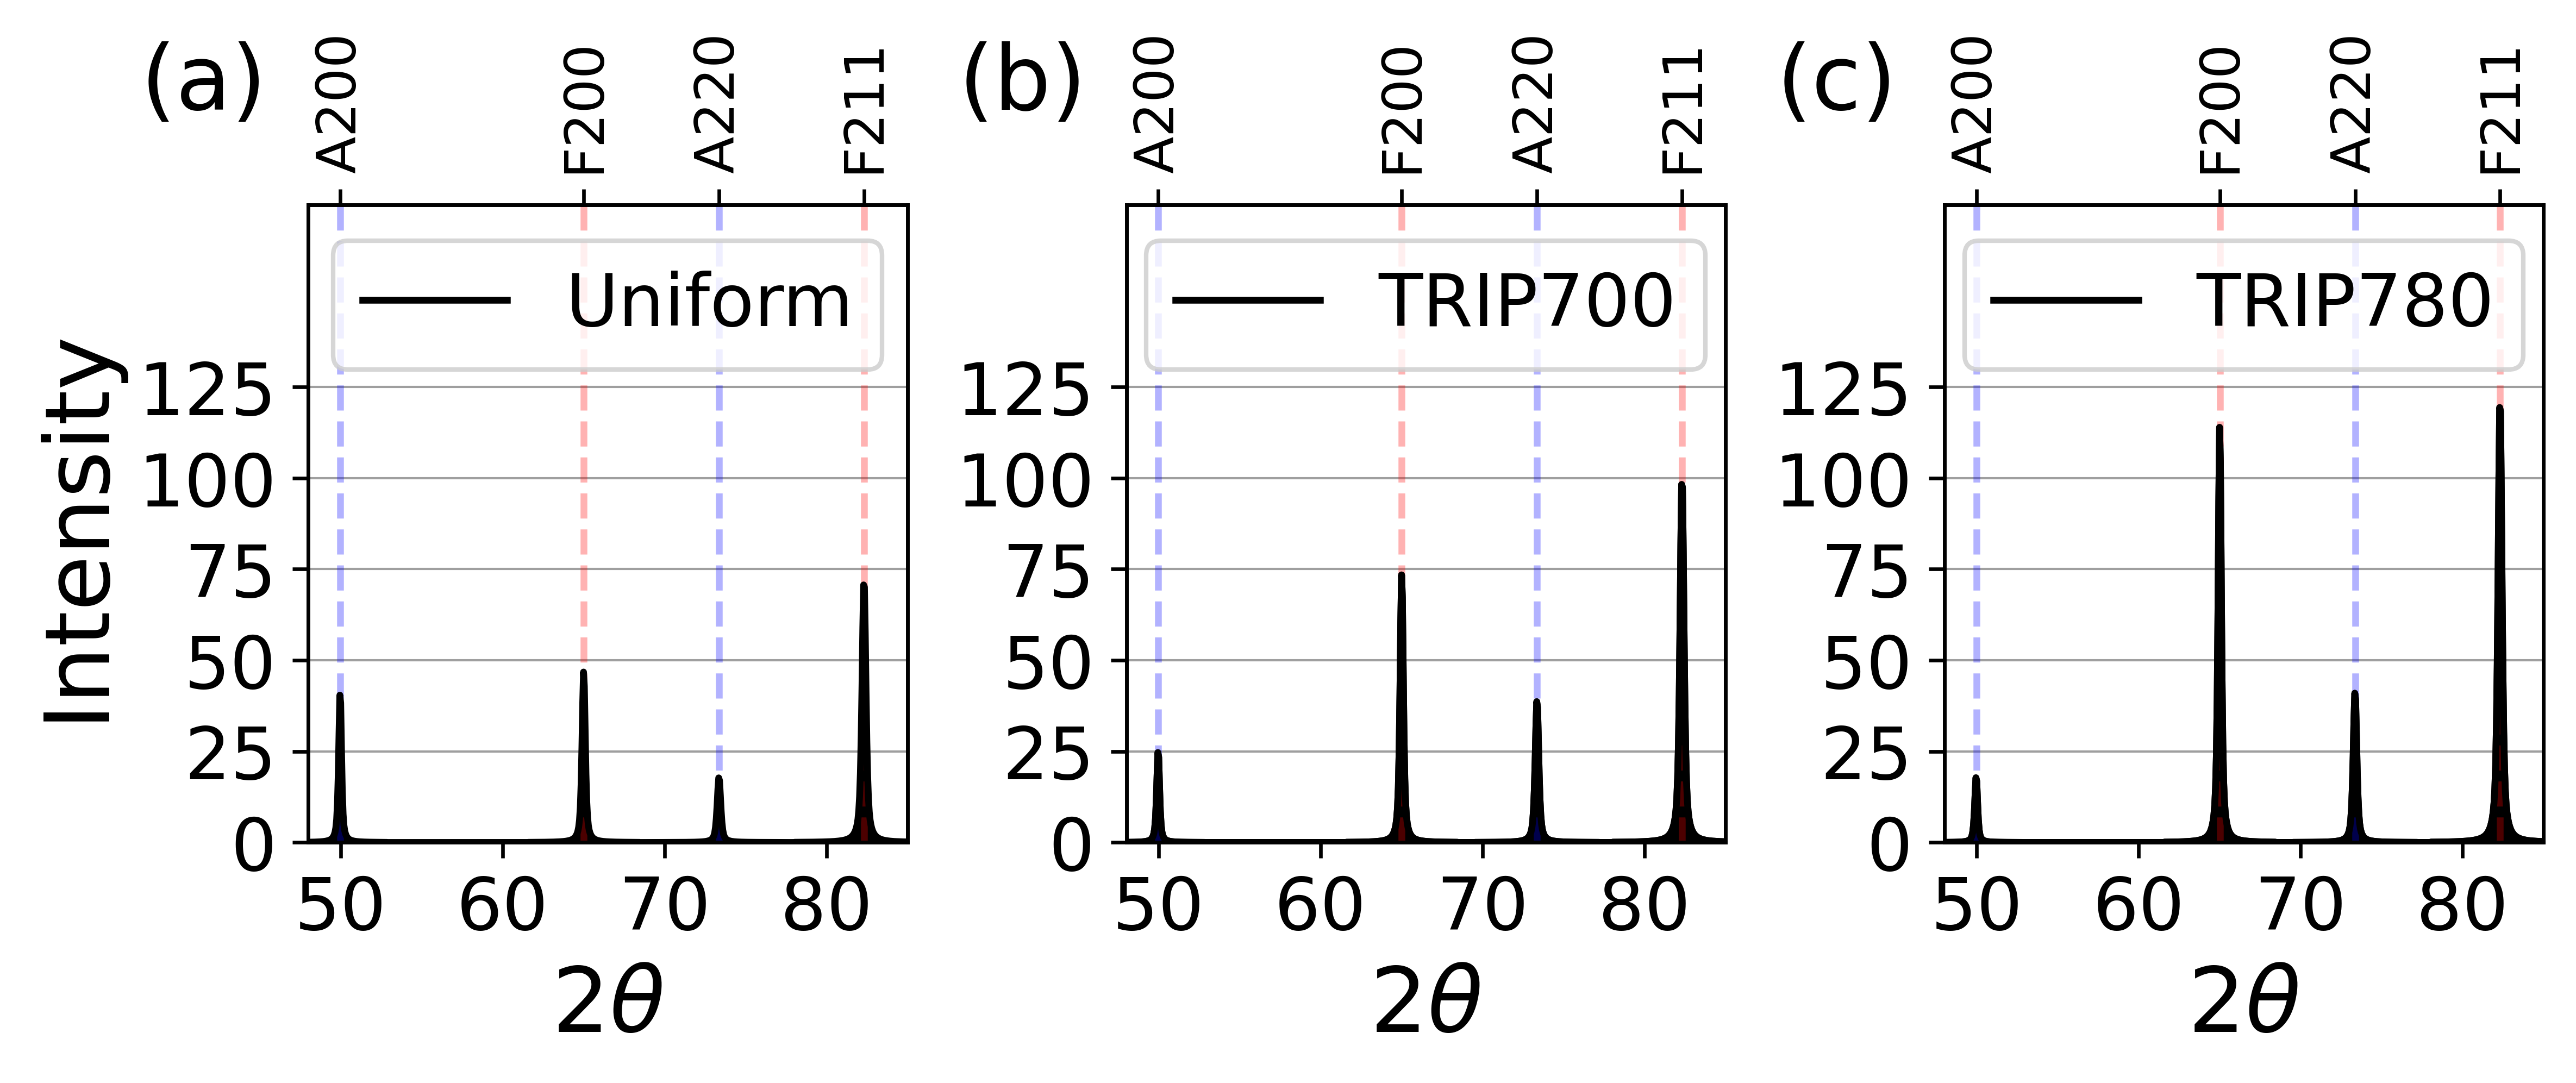

In [8]:

fig = plt.figure(figsize=(8,3.5), dpi=600)


ax1 = fig.add_subplot(131)
ax1.plot(UniformData[:,0],UniformData[:,1], label='Uniform',color='k')
ax1.fill_between(UniformData[:,0], 0, UniformData[:,1], color='k', alpha=1)

ax1.set_xlabel(r'2$\theta$', fontsize=20)
ax1.set_ylabel('Intensity', fontsize=20)
ax1.set_xticks([50,60,70,80])
ax1.set_yticks([0,25,50,75,100,125])
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.set_xlim([48, 85])
ax1.set_ylim([0, 175])

ax12 = ax1.twiny()
ax12.set_xlim(ax1.get_xlim())


ManyLabels2=np.append(APeakLabels2,FPeakLabels2)
ManyTics2=np.append(APeak2theta2,FPeak2theta2)

ax12.set_xticks(ManyTics2)
ax12.set_xticklabels(ManyLabels2, color='k', rotation=90)
ax12.xaxis.set_tick_params(labelsize=12)

#ax1.grid()
#ax2.set_axisbelow(True)

for pos in APeak2theta2:
    ax1.axvline(pos,color='b',linestyle='dashed',alpha=.3,zorder=1)

for pos in FPeak2theta2:
    ax1.axvline(pos,color='r',linestyle='dashed',alpha=.3,zorder=1)

ax1.annotate('(a)', xy=(50, 150), xycoords='data',xytext=(-.28,1.15),textcoords='axes fraction',fontsize=20)

ax1.set_axisbelow(True)
ax1.grid(color='#9F9F9F', linestyle='-', linewidth=0.5)
ax1.xaxis.grid(False)
ax1.legend(loc='upper center', ncol=2,fontsize=16)

##### second plot

ax2 = fig.add_subplot(132)
ax2.plot(TRIP700Data[:,0],TRIP700Data[:,1], label='TRIP700',color = 'k', lw=1.5, alpha=1)
ax2.fill_between(TRIP700Data[:,0],0,TRIP700Data[:,1], label='',color = 'k', lw=1.5, alpha=1)

ax2.set_xlabel(r'2$\theta$', fontsize=20)
#ax2.set_ylabel('Intensity', fontsize=20)
ax2.set_xticks([50,60,70,80])
ax2.set_yticks([0,25,50,75,100,125])
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.set_xlim([48, 85])
ax2.set_ylim([0, 175])


ax22 = ax2.twiny()
ax22.set_xlim(ax2.get_xlim())


ManyLabels2=np.append(APeakLabels2,FPeakLabels2)
ManyTics2=np.append(APeak2theta2,FPeak2theta2)

ax22.set_xticks(ManyTics2)
ax22.set_xticklabels(ManyLabels2, color='k', rotation=90)
ax22.xaxis.set_tick_params(labelsize=12)

#ax1.grid()
#ax2.set_axisbelow(True)

for pos in APeak2theta2:
    ax2.axvline(pos,color='b',linestyle='dashed',alpha=.3,zorder=1)

for pos in FPeak2theta2:
    ax2.axvline(pos,color='r',linestyle='dashed',alpha=.3,zorder=1)

ax2.annotate('(b)', xy=(50, 150), xycoords='data',xytext=(-.28,1.15),textcoords='axes fraction',fontsize=20)
ax2.set_axisbelow(True)
ax2.grid(color='#9F9F9F', linestyle='-', linewidth=0.5)
ax2.xaxis.grid(False)
ax2.legend(loc='upper center', ncol=2,fontsize=16)


##### third plot

ax3 = fig.add_subplot(133)
ax3.plot(TRIP780Data[:,0],TRIP780Data[:,1], label='TRIP780',color = 'k', lw=1.5, alpha=1)
ax3.fill_between(TRIP780Data[:,0],0,TRIP780Data[:,1], label='',color = 'k', lw=1.5, alpha=1)

ax3.set_xlabel(r'2$\theta$', fontsize=20)
#ax2.set_ylabel('Intensity', fontsize=20)
ax3.set_xticks([50,60,70,80])
ax3.set_yticks([0,25,50,75,100,125])
ax3.xaxis.set_tick_params(labelsize=16)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.set_xlim([48, 85])
ax3.set_ylim([0, 175])


ax32 = ax3.twiny()
ax32.set_xlim(ax3.get_xlim())


ManyLabels2=np.append(APeakLabels2,FPeakLabels2)
ManyTics2=np.append(APeak2theta2,FPeak2theta2)

ax32.set_xticks(ManyTics2)
ax32.set_xticklabels(ManyLabels2, color='k', rotation=90)
ax32.xaxis.set_tick_params(labelsize=12)

#ax1.grid()
#ax2.set_axisbelow(True)

for pos in APeak2theta2:
    ax3.axvline(pos,color='b',linestyle='dashed',alpha=.3,zorder=1)

for pos in FPeak2theta2:
    ax3.axvline(pos,color='r',linestyle='dashed',alpha=.3,zorder=1)

ax3.annotate('(c)', xy=(50, 150), xycoords='data',xytext=(-.28,1.15),textcoords='axes fraction',fontsize=20)
ax3.set_axisbelow(True)
ax3.grid(color='#9F9F9F', linestyle='-', linewidth=0.5)
ax3.xaxis.grid(False)
ax3.legend(loc='upper center', ncol=2,fontsize=16)


plt.tight_layout()

#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)


#ax.legend()
# Remove comment character to save to file
#plt.savefig("I-2thetaZoom-Compare.pdf", dpi=600,format="pdf")
#plt.savefig("I-2thetaZoom-Compare.eps", dpi=600,format="eps")
plt.savefig("I-2thetaZoom-Compare.png", dpi=600,format="png")
plt.show()

# Additional plots, not used in the paper

## Details of two peaks  -Uniform Distribution

In [ ]:
fig, ax1 = plt.subplots()


ax1.plot(UniformData[:,0],UniformData[:,1], label='Uniform Textures',color='k')
ax1.fill_between(UniformData[:,0],0, UniformData[:,1], color='k', alpha=0.5)
ax1.plot(TRIP700Data[:,0],TRIP700Data[:,0], label='',color='m', lw=1.5, alpha=0)

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())



ManyLabels2=np.append(APeakLabels2,FPeakLabels2)
ManyTics2=np.append(APeak2theta2,FPeak2theta2)

#print ManyTics

#ax1.set_xticks(APeak2theta)
#ax1.set_xticklabels(APeakLabels, color='g', rotation=90)

#ax1.set_xticks(FPeak2theta)
#ax1.set_xticklabels(FPeakLabels, color='b', rotation=90)

ax2.set_xticks(ManyTics2)
ax2.set_xticklabels(ManyLabels2, color='k', rotation=90)
ax2.xaxis.set_tick_params(labelsize=10)

#ax1.grid()
#ax2.set_axisbelow(True)

for pos in APeak2theta2:
    ax1.axvline(pos,color='b',linestyle='dashed',alpha=.3,zorder=1)

for pos in FPeak2theta2:
    ax1.axvline(pos,color='r',linestyle='dashed',alpha=.3,zorder=1)


ax1.set_ylim([0, 100])
ax1.set_xlim([46, 85])
ax2.set_xlim([46, 85])


ax1.legend(loc='upper center', ncol=2)
#ax.legend()
#plt.savefig("I-2thetaZoom-Conf.pdf", dpi=600,format="pdf")
plt.show()

In [ ]:
fig, ax1 = plt.subplots()


ax1.plot(UniformData[:,0],UniformData[:,1], label='Uniform Textures',color='k')
ax1.fill_between(UniformData[:,0], 0, UniformData[:,1], color='k', alpha=.5)
ax1.plot(TRIP700Data[:,0],TRIP700Data[:,1], label='TRIP700',color='m', lw=1.5, alpha=.7)

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())


ManyLabels2=np.append(APeakLabels2,FPeakLabels2)
ManyTics2=np.append(APeak2theta2,FPeak2theta2)

#print ManyTics

#ax1.set_xticks(APeak2theta)
#ax1.set_xticklabels(APeakLabels, color='g', rotation=90)

#ax1.set_xticks(FPeak2theta)
#ax1.set_xticklabels(FPeakLabels, color='b', rotation=90)

ax2.set_xticks(ManyTics2)
ax2.set_xticklabels(ManyLabels2, color='k', rotation=90)
ax2.xaxis.set_tick_params(labelsize=10)

#ax1.grid()
#ax2.set_axisbelow(True)

for pos in APeak2theta2:
    ax1.axvline(pos,color='b',linestyle='dashed',alpha=.3,zorder=1)

for pos in FPeak2theta2:
    ax1.axvline(pos,color='r',linestyle='dashed',alpha=.3,zorder=1)


ax1.set_ylim([0, 100])
ax1.set_xlim([46, 85])
ax2.set_xlim([46, 85])


ax1.legend(loc='upper center', ncol=2)
#ax.legend()
#plt.savefig("I-2thetaZoom-wExp-Conf.pdf", dpi=600,format="pdf")
plt.show()

## Plot next to each other

In [ ]:
fig = plt.figure(figsize=(8,5), dpi=600)

ax1 = fig.add_subplot(221)
ax1.plot(UniformData[:,0],UniformData[:,1], label='Uniform Textures',color='k')
ax1.fill_between(UniformData[:,0], 0, UniformData[:,1], color='k', alpha=1)

ax1.set_xlabel(r'2$\theta$', fontsize=20)
ax1.set_ylabel('Intensity', fontsize=20)
ax1.set_xlim([46, 85])
ax1.set_ylim([0, 120])

ax12 = ax1.twiny()
ax12.set_xlim(ax1.get_xlim())


ManyLabels2=np.append(APeakLabels2,FPeakLabels2)
ManyTics2=np.append(APeak2theta2,FPeak2theta2)

ax12.set_xticks(ManyTics2)
ax12.set_xticklabels(ManyLabels2, color='k', rotation=90)
ax12.xaxis.set_tick_params(labelsize=10)

#ax1.grid()
#ax2.set_axisbelow(True)

for pos in APeak2theta2:
    ax1.axvline(pos,color='b',linestyle='dashed',alpha=.3,zorder=1)

for pos in FPeak2theta2:
    ax1.axvline(pos,color='r',linestyle='dashdot',alpha=.3,zorder=1)



ax1.legend(loc='upper center', ncol=2)

ax2 = fig.add_subplot(222)
ax2.plot(TRIP700Data[:,0],TRIP700Data[:,1], label='TRIP700',color = '#00BFFF', lw=1.5, alpha=1)
ax2.fill_between(TRIP700Data[:,0],0,TRIP700Data[:,1], label='',color = '#00BFFF', lw=1.5, alpha=1)

ax2.set_xlabel(r'2$\theta$', fontsize=20)
#ax2.set_ylabel('Intensity', fontsize=20)

ax2.set_xlim([46, 85])
ax2.set_ylim([0, 120])


ax22 = ax2.twiny()
ax22.set_xlim(ax2.get_xlim())


ManyLabels2=np.append(APeakLabels2,FPeakLabels2)
ManyTics2=np.append(APeak2theta2,FPeak2theta2)

ax22.set_xticks(ManyTics2)
ax22.set_xticklabels(ManyLabels2, color='k', rotation=90)
ax22.xaxis.set_tick_params(labelsize=10)

#ax1.grid()
#ax2.set_axisbelow(True)

for pos in APeak2theta2:
    ax2.axvline(pos,color='b',linestyle='dashed',alpha=.3,zorder=1)

for pos in FPeak2theta2:
    ax2.axvline(pos,color='r',linestyle='dashdot',alpha=.3,zorder=1)


ax2.legend(loc='upper center', ncol=2)


#ax.legend()


#plt.savefig("I-2thetaZoom-Compare.pdf", dpi=600,format="pdf")
#plt.savefig("I-2thetaZoom-Compare.eps", dpi=600,format="eps")
plt.show()

## Attempt at an inset figure showing Texture effect - not used, hard to see

In [ ]:
# needs an additional package
import matplotlib.patches as patches

### frame
fig=plt.figure()
ax11 = fig.add_subplot(111)

ax11.set_xlim(35,145)
ax11.set_xlabel(r'2$\theta$', fontsize=20)

ax11.set_ylim(-25,450)
ax11.set_ylabel('Intensity', fontsize=20)
ax11.xaxis.set_tick_params(labelsize=12)
ax11.yaxis.set_tick_params(labelsize=12)


ax21 = ax11.twiny() # to show tick labels
ax21.set_xlim(ax11.get_xlim())



ManyLabels=np.append(APeakLabels,FPeakLabels)
ManyTics=np.append(APeak2theta,FPeak2theta)

#print ManyTics

ax21.set_xticks(ManyTics)
ax21.set_xticklabels(ManyLabels, color='k', rotation=90)
ax21.xaxis.set_tick_params(labelsize=10)

for pos in APeak2theta:
    ax11.axvline(pos,color='b',linestyle='dashed',alpha=.3,zorder=1)

for pos in FPeak2theta:
    ax11.axvline(pos,color='r',linestyle='dashdot',alpha=.3,zorder=1)
    

legend=ax11.legend(loc='upper right',fontsize=10)


ax11.plot(UniformData[:,0],UniformData[:,1], label='Uniform Texture',color='k')
ax11.plot(0,0, label='TRIP 700',color='c')

ax11.legend(loc='upper center', ncol=2)

#Inset box
ax11.add_patch(patches.Rectangle((46, 0), 39, 110,fill=False, color='0.65' ))     # removes background
ax11.plot((46, 88), (110, 355), color='0.65')
ax11.plot((85, 138), (0, 142), color='0.65')


#########
### Inset Figure
########


#fig, ax1 = plt.subplots()

left, bottom, width, height = [0.5, 0.4, 0.35, 0.35]
ax1 = fig.add_axes([left, bottom, width, height])

ax1.plot(UniformData[:,0],UniformData[:,1], label='Uniform Textures',color='k',lw=.5,alpha=1)
ax1.fill_between(UniformData[:,0], 0, UniformData[:,1], color='k', alpha=1)
ax1.plot(TRIP700Data[:,0],TRIP700Data[:,1], label='TRIP700',color='r', lw=.5, alpha=.7)
ax1.fill_between(TRIP700Data[:,0], 0, TRIP700Data[:,1], color='r', alpha=.7)

#draw a short horizontal line to indicate max intensity
#points just pasted in from datafiles
#Uniform
ax1.plot((49+2, 51+2), (40.42064, 40.42064), 'k-', lw=1.5)
ax1.plot((64, 66), (46.76295975, 46.76295975), 'k-', lw=1.5)
ax1.plot((72.35, 74.35),(17.7174025, 17.7174025), 'k-', lw=1.5)
ax1.plot((81.3, 83.3),(70.67766375, 70.67766375), 'k-', lw=1.5)
#TRIP 700
ax1.plot((49+2, 51+2), (24.6565904, 24.6565904), 'c-', lw=1.5)
ax1.plot((64, 66), (73.4178468075, 73.4178468075), 'c-', lw=1.5)
ax1.plot((72.35, 74.35),(38.62393745, 38.62393745), 'c-', lw=1.5)
ax1.plot((81.3, 83.3),(98.2419526125, 98.2419526125), 'c-', lw=1.5)


#ax2 = ax1.twiny()
#ax2.set_xlim(ax1.get_xlim())


#ManyLabels2=np.append(APeakLabels2,FPeakLabels2)
#ManyTics2=np.append(APeak2theta2,FPeak2theta2)

#print ManyTics

#ax1.set_xticks(APeak2theta)
#ax1.set_xticklabels(APeakLabels, color='g', rotation=90)

#ax1.set_xticks(FPeak2theta)
#ax1.set_xticklabels(FPeakLabels, color='b', rotation=90)

#ax2.set_xticks(ManyTics2)
#ax2.set_xticklabels(ManyLabels2, color='k', rotation=90)
#ax2.xaxis.set_tick_params(labelsize=10)

#ax1.grid()
#ax2.set_axisbelow(True)

for pos in APeak2theta2:
    ax1.axvline(pos,color='b',linestyle='dashed',alpha=.3,zorder=1)

for pos in FPeak2theta2:
    ax1.axvline(pos,color='r',linestyle='dashdot',alpha=.3,zorder=1)


ax1.set_ylim([0, 110])
ax1.set_xlim([46, 85])
ax2.set_xlim([46, 85])

ax1.set_xticks([])
ax1.set_yticks([])

#xlabels = [item.get_text() for item in ax1.get_xticklabels()]
#empty_string_xlabels = ['']*len(xlabels)
#ax1.set_xticklabels(empty_string_xlabels)

#ylabels = [item.get_text() for item in ax1.get_yticklabels()]
#empty_string_ylabels = ['']*len(ylabels)
#ax1.set_yticklabels(empty_string_ylabels)

#ax1.legend(loc='upper center', ncol=2)

#ax.legend()
#plt.savefig("I-2theta-InsetDraft.pdf", dpi=600,format="pdf")
#plt.savefig("I-2theta-InsetDraft.eps", dpi=600,format="eps")
plt.show()